# Thresholding

In [ ]:
# Get the data from VisionCog website

! unzip imgOCV.zip

In [ ]:
# All required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

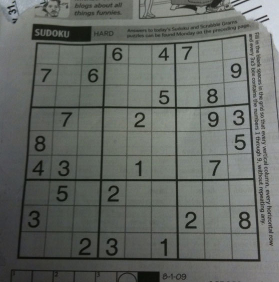

In [ ]:
img = cv2.imread('imgOCV/sudoku.png', 1)

cv2_imshow(img)

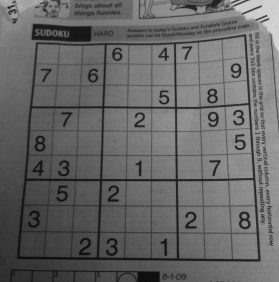

In [ ]:
img_Gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(img_Gray)

## Global thresholding

In [ ]:
# threshold(src, thresh, maxval, type[, dst]) -> retval, dst
# .   @brief Applies a fixed-level threshold to each array element.

ret,thresh1 = cv2.threshold(src=img_Gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)

ret,thresh2 = cv2.threshold(src=img_Gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY_INV)

ret,thresh3 = cv2.threshold(src=img_Gray, thresh=127, maxval=255, type=cv2.THRESH_TRUNC)

ret,thresh4 = cv2.threshold(src=img_Gray, thresh=127, maxval=255, type=cv2.THRESH_TOZERO)

ret,thresh5 = cv2.threshold(src=img_Gray, thresh=127, maxval=255, type=cv2.THRESH_TOZERO_INV)


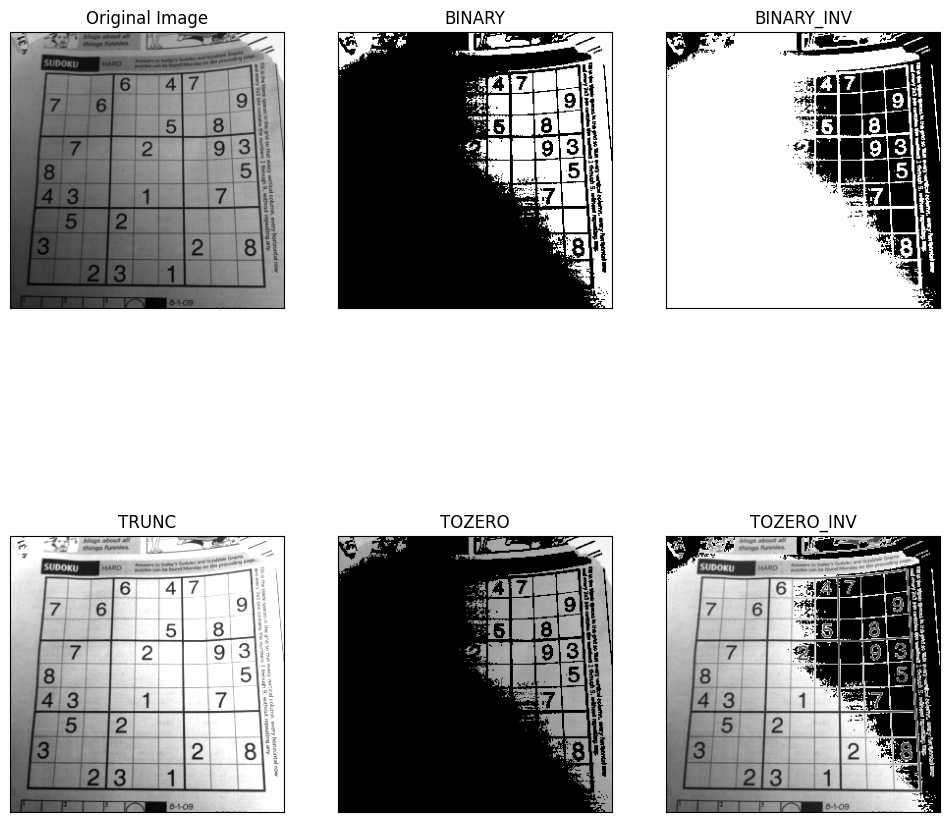

In [ ]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_Gray, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(12,12))

for i in range(6):

    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])


plt.show()

## Adaptive thresholding

In [ ]:
# adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
# .   @brief Applies an adaptive threshold to an array.

th_MEAN = cv2.adaptiveThreshold(src=img_Gray, maxValue=255,
                                adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
                                thresholdType=cv2.THRESH_BINARY,
                                blockSize=5, C=5)

th_GAUSSIAN = cv2.adaptiveThreshold(src=img_Gray, maxValue=255,
                                    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    thresholdType=cv2.THRESH_BINARY,
                                    blockSize=5, C=5)


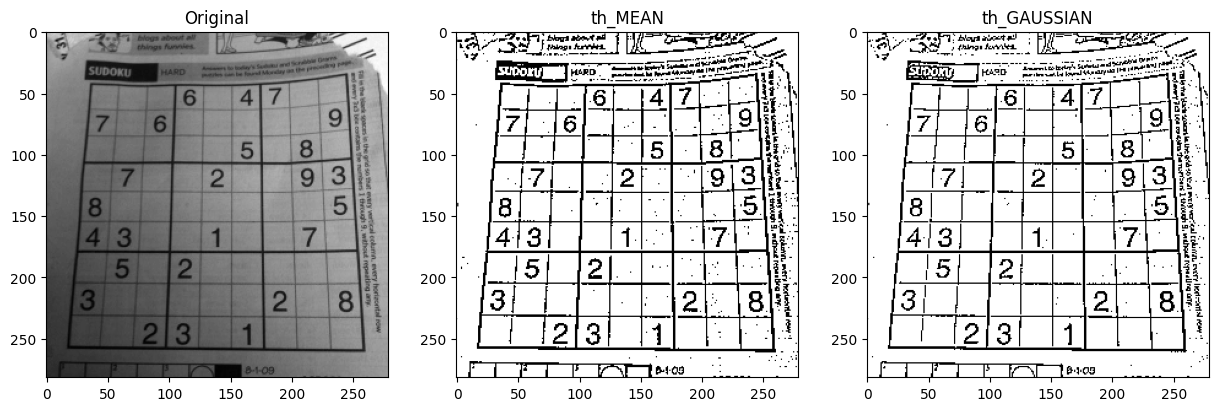

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

ax1.set_title('Original')
ax1.imshow(img_Gray, cmap='gray')

ax2.set_title('th_MEAN')
ax2.imshow(th_MEAN, cmap='gray')

ax3.set_title('th_GAUSSIAN')
ax3.imshow(th_GAUSSIAN, cmap='gray')

## Otsu Binarization

# Otsu's threshold method.

Otsu’s thresholding is a mathematical algorithm that finds the best threshold to separate image pixels into two classes—background and foreground—by maximizing **between-class variance** or minimizing **within-class variance**.

## Key Steps

- **Normalized histogram:** For each intensity level \$ i \$, calculate the probability \$ p_i = \frac{n_i}{N} \$ where \$ n_i \$ is the number of pixels at intensity \$ i \$, and \$ N \$ is the total number of pixels.


- **Class probabilities:** For threshold \$ t \$:
    - \$ \omega_0(t) = \sum_{i=0}^{t-1} p(i) \$ (background)
    - \$ \omega_1(t) = \sum_{i=t}^{L-1} p(i) \$ (foreground), where \$ L \$ is the number of possible intensities.


- **Class means:**
    - \$ \mu_0(t) = \frac{\sum_{i=0}^{t-1} i \cdot p(i)}{\omega_0(t)} \$
    - \$ \mu_1(t) = \frac{\sum_{i=t}^{L-1} i \cdot p(i)}{\omega_1(t)} \$


- **Between-class variance:** For every threshold:

    $$
    \sigma_b^2(t) = \omega_0(t)\omega_1(t)[\mu_0(t) - \mu_1(t)]^2
    $$.

- **Find the optimal threshold
$
t^*$:** Iterate through all possible $t$, selecting the one where $
\sigma_b^2(t)$ is maximized (best separation).

  - maximizing \$ \sigma_b^2(t) \$ means finding the threshold where the two classes are as far apart as possible in terms of intensity, weighted by their probabilities, ensuring good separation between foreground and background.

- **Segment:** Assign all pixels with intensity > $t^*$ to the foreground, and ≤ $t^*$ to the background.



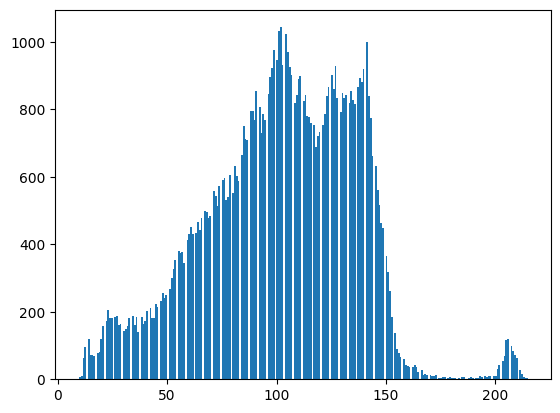

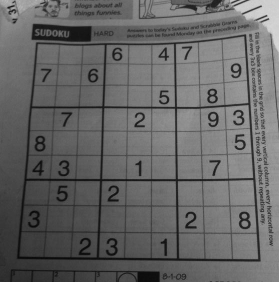

In [ ]:
img_Gray = cv2.imread('imgOCV/sudoku.png', 0)

flatten = img_Gray.ravel()
plt.hist(flatten, 256)
plt.show()

cv2_imshow(img_Gray)

### Set __thresh=0__ when using Otsu
### __type=cv2.THRESH_BINARY + cv2.THRESH_OTSU__

In [ ]:
# threshold(src, thresh, maxval, type[, dst]) -> retval, dst
# .   @brief Applies a fixed-level threshold to each array element.

# Set thresh=0 when using Otsu

# Otsu's thresholding
ret1, th_OTSU = cv2.threshold(img_Gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img_Gray,(3,3),0)
ret2,th_OTSU_GAUSS = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

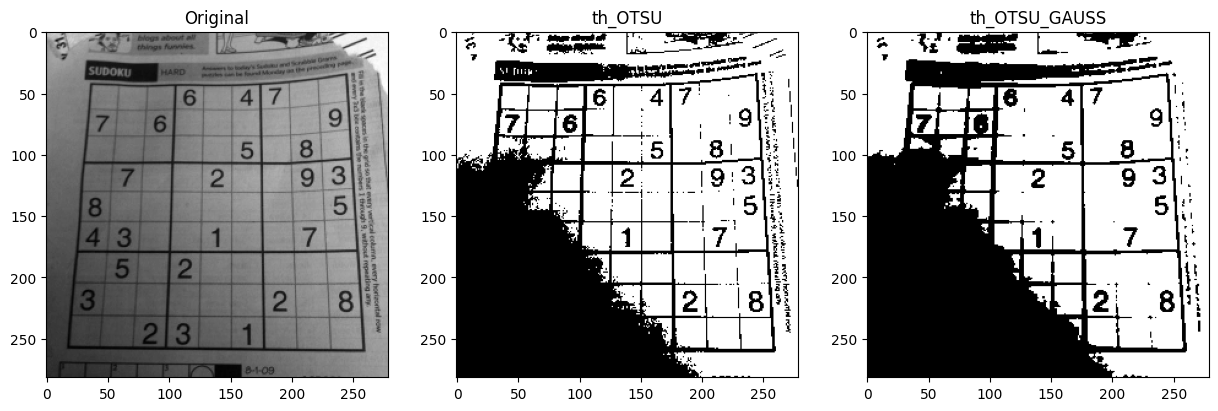

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

ax1.set_title('Original')
ax1.imshow(img_Gray, cmap='gray')

ax2.set_title('th_OTSU')
ax2.imshow(th_OTSU, cmap='gray')

ax3.set_title('th_OTSU_GAUSS')
ax3.imshow(th_OTSU_GAUSS, cmap='gray')

plt.show()

- https://learnopencv.com/otsu-thresholding-with-opencv/
- https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

**`boat.jpg`**

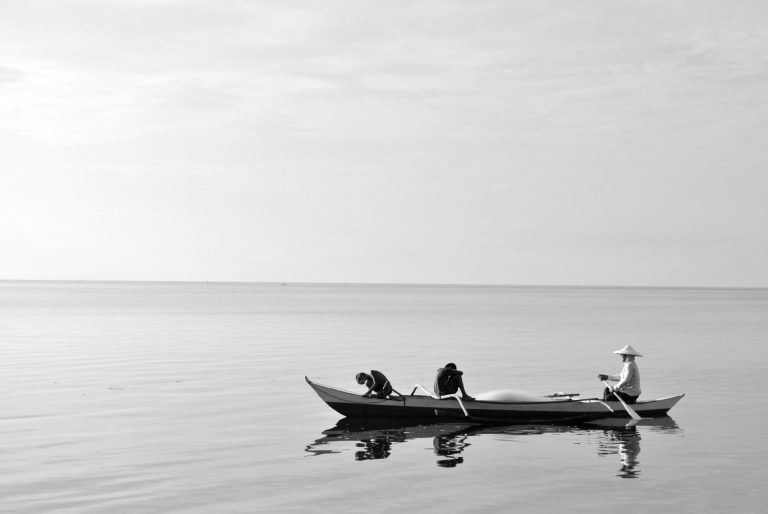

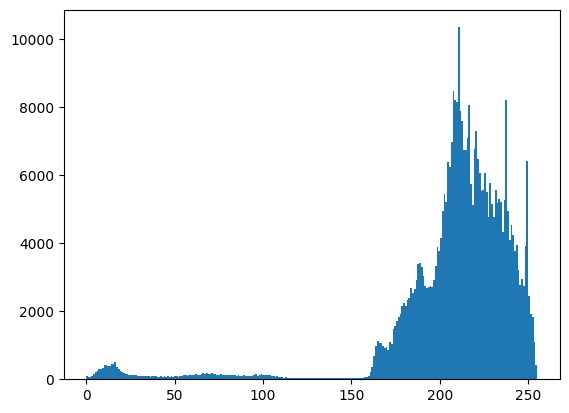

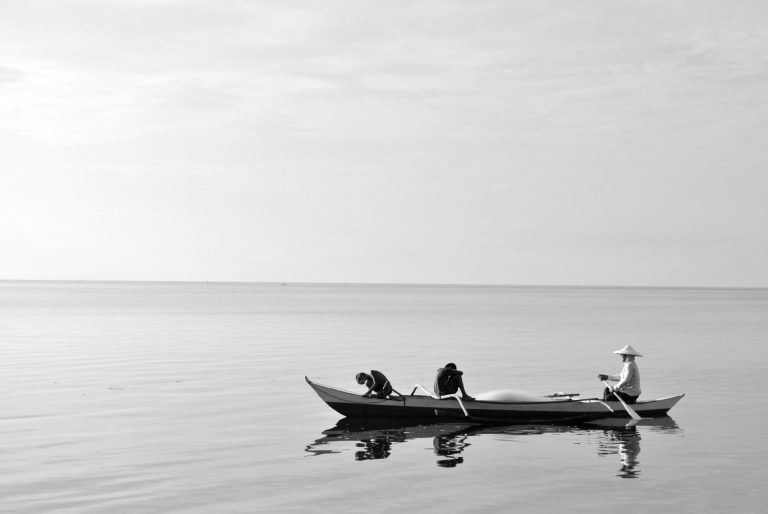

In [ ]:
img_Gray = cv2.imread('boat.jpg', 0)

flatten = img_Gray.ravel()
plt.hist(flatten, 256)
plt.show()

cv2_imshow(img_Gray)

In [ ]:
ret1, th_OTSU = cv2.threshold(img_Gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img_Gray,(3,3),0)
ret2,th_OTSU_GAUSS = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
print(f'ret1: {ret1}, ret2: {ret2}')

ret1: 132.0, ret2: 134.0


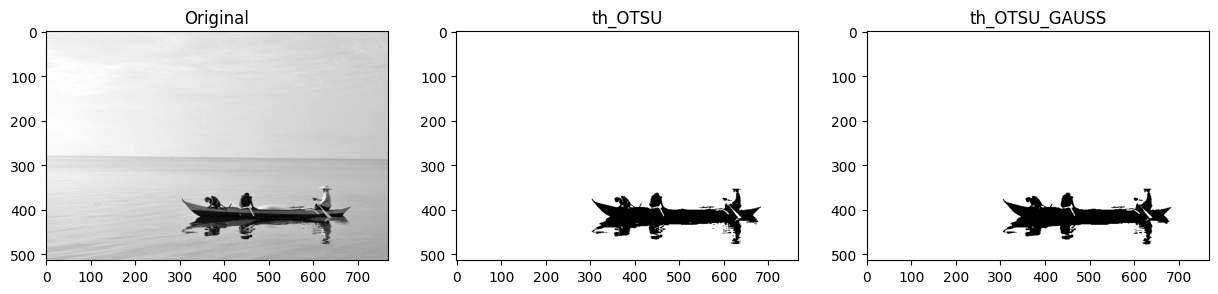

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

ax1.set_title('Original')
ax1.imshow(img_Gray, cmap='gray')

ax2.set_title('th_OTSU')
ax2.imshow(th_OTSU, cmap='gray')

ax3.set_title('th_OTSU_GAUSS')
ax3.imshow(th_OTSU_GAUSS, cmap='gray')

plt.show()